Histograms and scatter plots for the Raposo low-rank network used in figure 1.

In [1]:
import sys
sys.path.append('../')
from low_rank_rnns.modules import *
from low_rank_rnns import raposo, helpers, regressions, clustering
import low_rank_rnns.mixedselectivity as ms
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Ellipse

In [2]:
helpers.setup_matplotlib()
color = sns.color_palette('deep')[0]

In [3]:
hidden_size = 512
noise_std = 0
alpha = 0.2

x_train, y_train, mask_train, x_val, y_val, mask_val = raposo.generate_data(1000)
net = LowRankRNN(4, hidden_size, 1, noise_std, alpha, rank=1)
net.load_state_dict(torch.load(f'../models/raposo_lr_fig1.pt', map_location='cpu'))
loss_orig, acc_orig = raposo.test(net, x_val, y_val, mask_val)
print(acc_orig)

0.9900000095367432


In [4]:
m = net.m[:,0].detach().numpy()
n = net.n[:,0].detach().numpy()
wi1 = net.wi_full[0].detach().numpy()
wi2 = net.wi_full[1].detach().numpy()
wi3 = net.wi_full[2].detach().numpy()
wi4 = net.wi_full[3].detach().numpy()
wo = net.wo_full[:,0].detach().numpy()

(500, 512)
clusteriness: -0.00619959186038213
data mean: 0.456, mc mean: 0.455
KS 2 sample test: p=0.977476222285816
Wilcoxon rank-sum test: p=0.8998157762805065
Kruskal-Wallis test: p=0.8998157764320108


(0.8998157762805065, -0.00619959186038213)

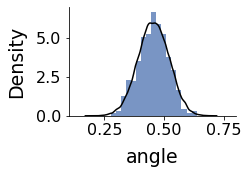

In [5]:
figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
conn_space = np.array([wi1, wi2, wi3, wi4, n, m]).transpose()
ms.epairs(conn_space, 500, figsize=figsize, xlim=(.1, .8), col=color)
# plt.savefig('figure_1/epairs_raposo.pdf', bbox_inches='tight')

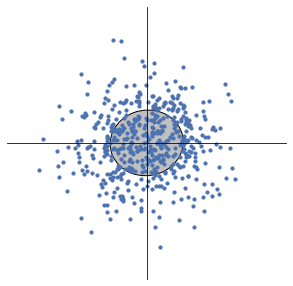

In [6]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(wi3, wi4, color=color, s=10)
helpers.center_axes(ax)
xlim = 1.3 * max(-np.min(wi3), np.max(wi3))
ylim = 1.3 * max(-np.min(wi4), np.max(wi4))
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)

X = np.array([wi3, wi4]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))

# plt.savefig('figure_1/raposo_loadings_scatter.svg', bbox_inches='tight')

# Resampling

In [7]:
net2 = clustering.to_support_net(net, np.zeros(hidden_size))
net2.resample_basis()
loss, acc = raposo.test(net2, x_val, y_val, mask_val)
print(loss, acc)

0.19681131839752197 1.0


In [8]:
m_res = net2.m.detach().numpy().squeeze()
n_res = net2.n.detach().numpy().squeeze()
wi_ctx1_res = net2.wi[2].detach().numpy().squeeze()
wi_ctx2_res = net2.wi[3].detach().numpy().squeeze()
wi1_res = net2.wi[0].detach().numpy().squeeze()
wi2_res = net2.wi[1].detach().numpy().squeeze()

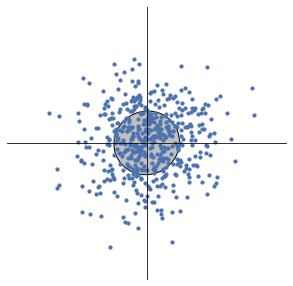

In [9]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(wi_ctx1_res, wi_ctx2_res, s=10, color=color)
helpers.center_axes(ax)
xlim = 1.3 * max(-np.min(wi_ctx1_res), np.max(wi_ctx1_res))
ylim = 1.3 * max(-np.min(wi_ctx2_res), np.max(wi_ctx2_res))
ax.set_xlim(-xlim, xlim)
ax.set_ylim(-ylim, ylim)

X = np.array([wi3, wi4]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))

# plt.savefig('figure_1/rapoos_res_scatter.svg', bbox_inches='tight')

(500, 512)
clusteriness: -0.1129772642234402
data mean: 0.463, mc mean: 0.455
KS 2 sample test: p=0.0016222444186880475
Wilcoxon rank-sum test: p=0.012943084797505037
Kruskal-Wallis test: p=0.01294308475618802


(0.012943084797505037, -0.1129772642234402)

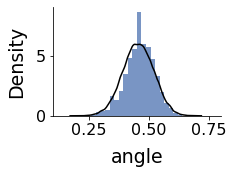

In [10]:
figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
conn_space = np.array([wi1_res, wi2_res, wi_ctx1_res, wi_ctx2_res, m_res, n_res]).T
ms.epairs(conn_space, 500, figsize=figsize, xlim=(.1, .8), col=color)
# plt.savefig('figure_1/epairs_raposo_res.pdf', bbox_inches='tight')